In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple

In [93]:
cat_map = plt.cm.tab10.colors
cont_map = plt.cm.Blues
vlines = {"linestyle": "--", "linewidth": 1}
a = np.linspace(0, 10, 500)

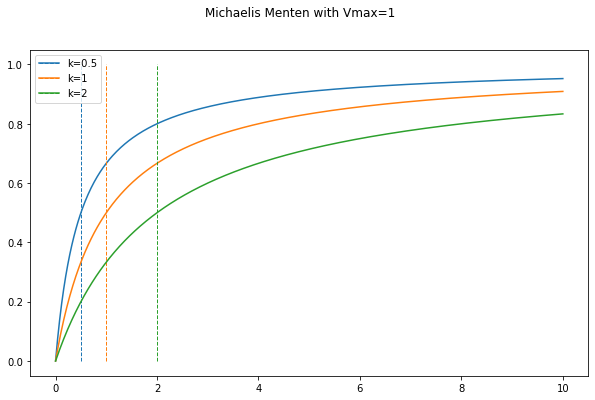

In [3]:
def mm(a, k, v=1):
    return v * a / (k + a)


ks = [0.5, 1, 2]

fig, ax = plt.subplots(figsize=(10, 6))

handles = []
labels = []
for i, k in enumerate(ks):
    col = cat_map[i]
    y = [mm(d, k=k) for d in a]
    a05 = k
    l2 = ax.vlines(a05, 0, 1, color=col, **vlines)
    l1, = ax.plot(a, y, color=col)
    handles.append((l1, l2))
    labels.append(f"k={k}")

ax.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=1)})

fig.suptitle("Michaelis Menten with Vmax=1")
plt.show()

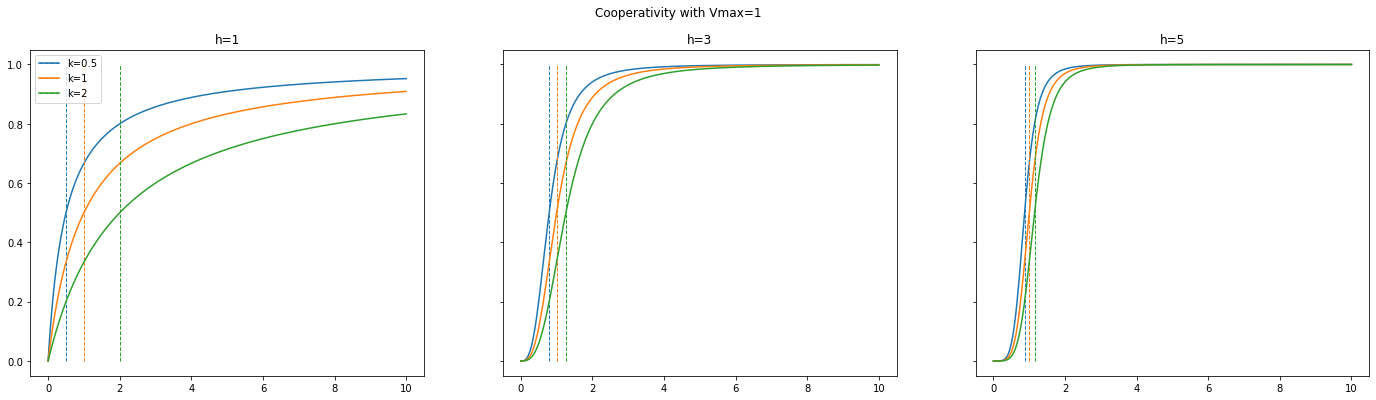

In [4]:
def coop(a, k, h, v=1):
    return v * a ** h / (k + a ** h)


hs = [1, 3, 5]
ks = [0.5, 1, 2]

fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(24, 6))

for col_i, h in enumerate(hs):
    handles = []
    labels = []
    for i, k in enumerate(ks):
        col = cat_map[i]
        y = [coop(d, k=k, h=h) for d in a]
        a05 = k ** (1 / h)
        l2 = axs[col_i].vlines(a05, 0, 1, color=col, **vlines)
        l1, = axs[col_i].plot(a, y, color=col)
        handles.append((l1, l2))
        labels.append(f"k={k}")

    if col_i == 0:
        axs[col_i].legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=1)})
    axs[col_i].title.set_text(f"h={h}")

fig.suptitle("Cooperativity with Vmax=1")
plt.show()

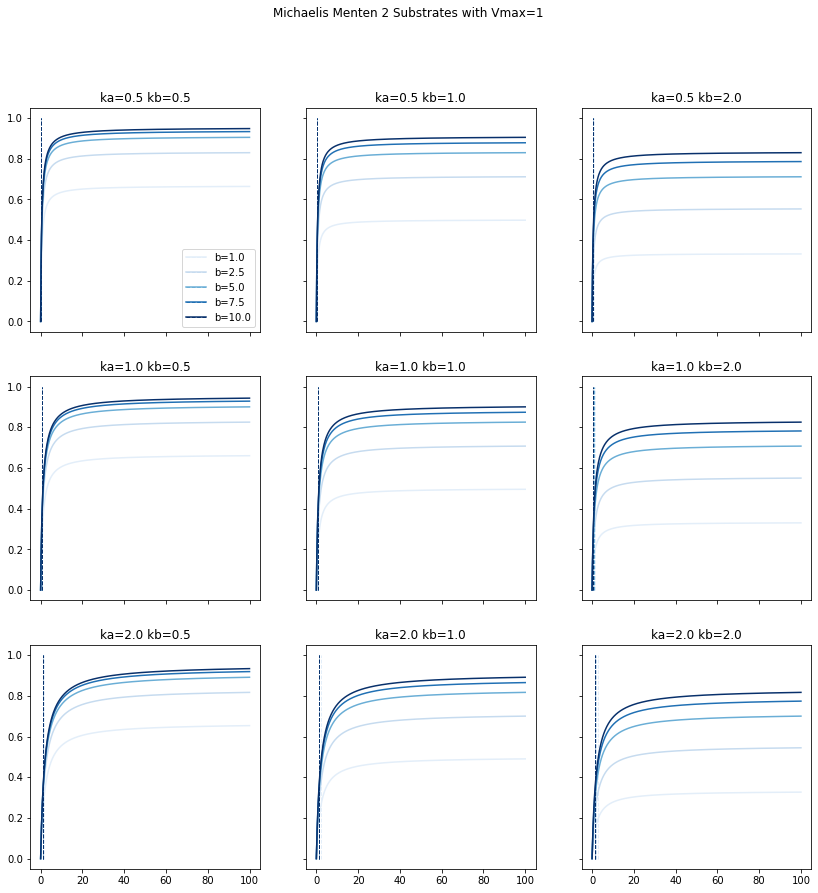

In [89]:
def mm_2(a, b, ka, kb, v=1):
    return v * a * b / (ka * kb + kb * a + ka * b + a * b)


kas = [0.5, 1, 2]
kbs = [0.5, 1, 2]
bs = [1.0, 2.5, 5, 7.5, 10.0]
a = np.linspace(0, 100, 500)

fig, axs = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(14, 14))

for row_i, ka in enumerate(kas):
    for col_i, kb in enumerate(kbs):
        handles = []
        labels = []
        for b in bs:
            col = cont_map(b / 10)
            y = [mm_2(d, b, ka=ka, kb=kb) for d in a]
            a05 = (ka * kb + ka * b) / (2 * b)
            l2 = axs[row_i, col_i].vlines(a05, 0, 1, color=col, **vlines)
            l1, = axs[row_i, col_i].plot(a, y, color=col)
            handles.append((l1, l2))
            labels.append(f"b={b:.1f}")
        if row_i == col_i == 0:
            axs[row_i, col_i].legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=1)})
        axs[row_i, col_i].title.set_text(f"ka={ka:.1f} kb={kb:.1f}")

fig.suptitle("Michaelis Menten 2 Substrates with Vmax=1")
plt.show()

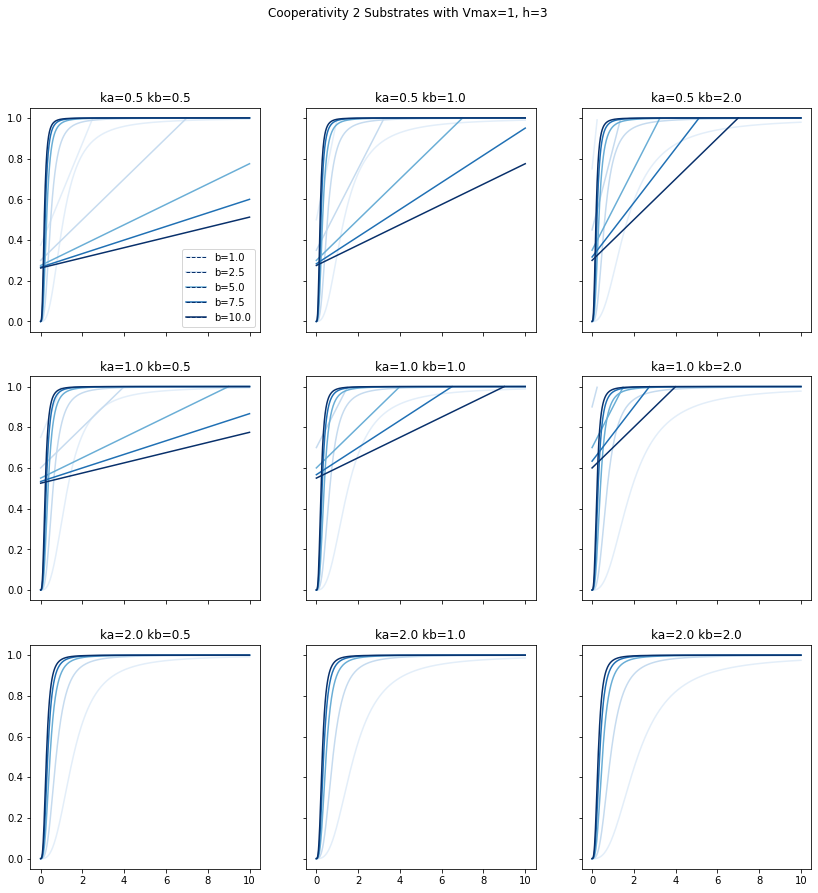

In [87]:
def coop_2(a, b, ka, kb, h=3, v=1):
    return v * (a * b) ** h / (ka * kb + kb * a + ka * b + (a * b) ** h)


kas = [0.5, 1, 2]
kbs = [0.5, 1, 2]
bs = [1.0, 2.5, 5, 7.5, 10.0]

fig, axs = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(14, 14))

for row_i, ka in enumerate(kas):
    for col_i, kb in enumerate(kbs):
        handles = []
        labels = []
        for b in bs:
            col = cont_map(b / 10)
            y = [coop_2(d, b, ka=ka, kb=kb) for d in a]
            a05 = [(ka * kb + ka * b + kb * d) / (2 * b) for d in a]
            l2 = axs[row_i, col_i].vlines(a05, 0, 1, color=col, **vlines)  # TODO: ?
            l1, = axs[row_i, col_i].plot(a, y, color=col)
            handles.append((l1, l2))
            labels.append(f"b={b:.1f}")
        if row_i == col_i == 0:
            axs[row_i, col_i].legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=1)})
        axs[row_i, col_i].title.set_text(f"ka={ka:.1f} kb={kb:.1f}")

fig.suptitle("Cooperativity 2 Substrates with Vmax=1, h=3")
plt.show()

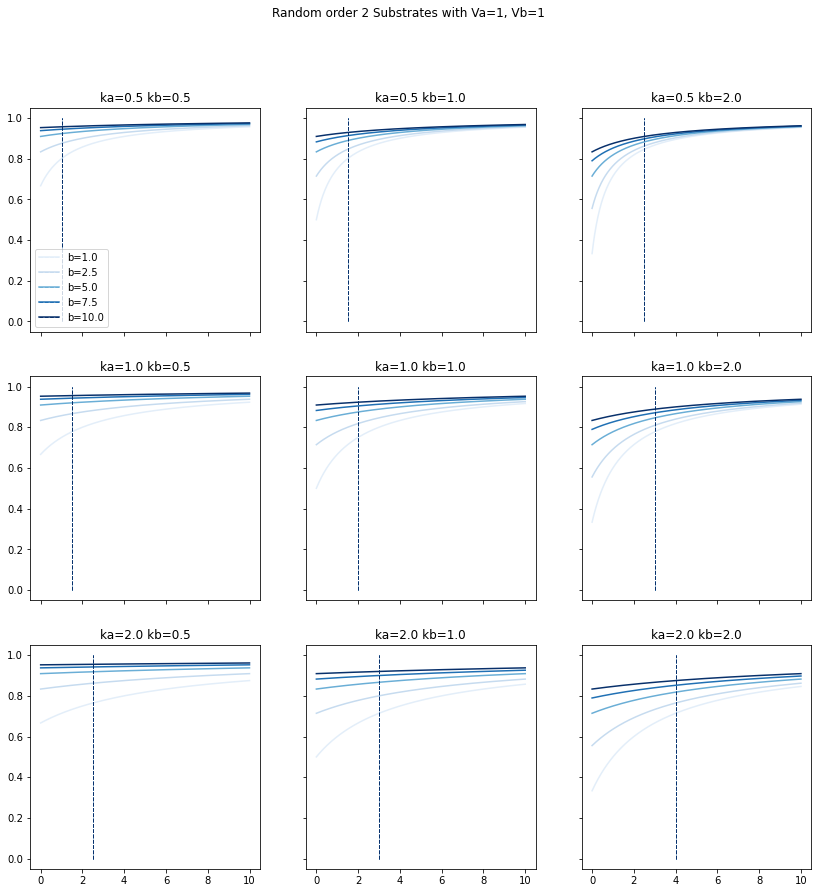

In [95]:
def random_order(a, b, ka, kb, va=1, vb=1):
    return (va * a / ka + vb * b / kb) / (1 + a / ka + b / kb)


# check https://depts.washington.edu/wmatkins/kinetics/inhibition.html

kas = [0.5, 1, 2]
kbs = [0.5, 1, 2]
bs = [1.0, 2.5, 5, 7.5, 10.0]

fig, axs = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(14, 14))

for row_i, ka in enumerate(kas):
    for col_i, kb in enumerate(kbs):
        handles = []
        labels = []
        for b in bs:
            col = cont_map(b / 10)
            y = [random_order(d, b, ka=ka, kb=kb) for d in a]
            a05 = ka + kb
            l2 = axs[row_i, col_i].vlines(a05, 0, 1, color=col, **vlines)  # TODO: ?
            l1, = axs[row_i, col_i].plot(a, y, color=col)
            handles.append((l1, l2))
            labels.append(f"b={b:.1f}")
        if row_i == col_i == 0:
            axs[row_i, col_i].legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=1)})
        axs[row_i, col_i].title.set_text(f"ka={ka:.1f} kb={kb:.1f}")

fig.suptitle("Random order 2 Substrates with Va=1, Vb=1")
plt.show()

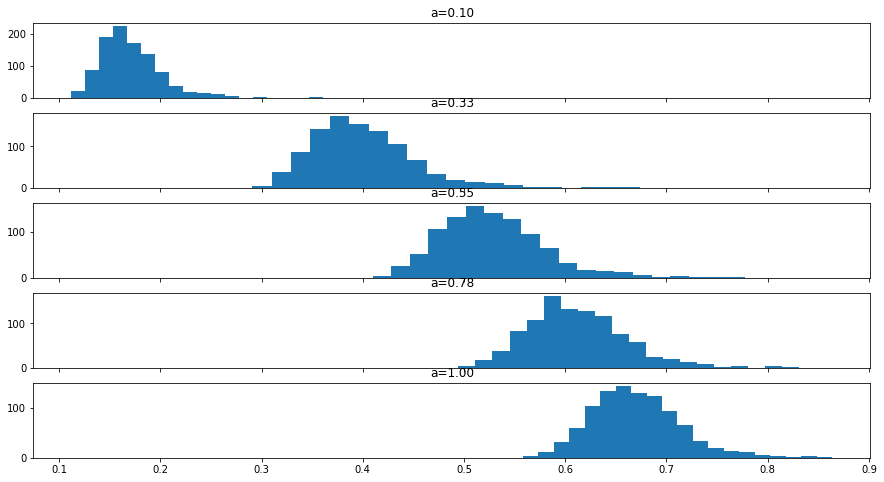

In [76]:
a_s = np.linspace(0.1, 1, 5)
#kms = np.random.uniform(3e-4, 2.6e-2, size=1000)
kms = np.random.normal(0.5, 0.1, size=1000)

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(15, 8))
for i, a_ in enumerate(a_s):
    axs[i].hist([coop(a_, k=d, h=1) for d in kms], bins=20)
    axs[i].title.set_text(f"a={a_:.2f}")
plt.show()

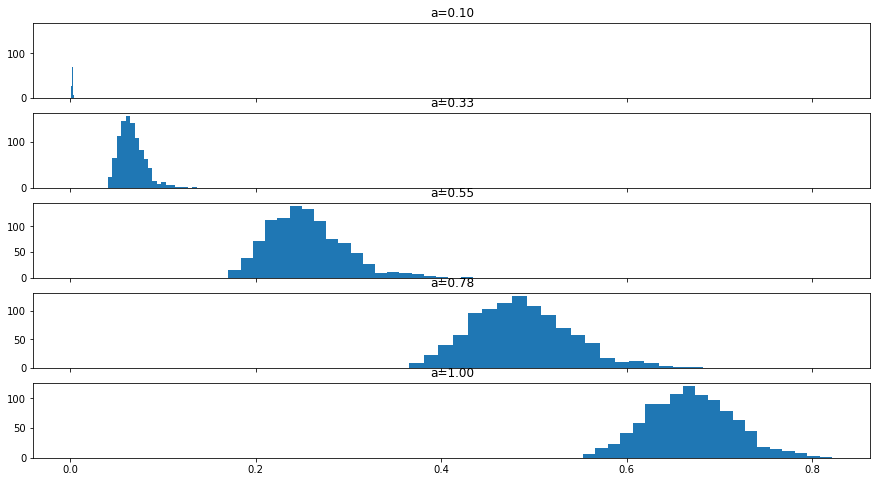

In [80]:
a_s = np.linspace(0.1, 1, 5)
#kms = np.random.uniform(3e-4, 2.6e-2, size=1000)
kms = np.random.normal(0.5, 0.1, size=1000)

fig, axs = plt.subplots(5, 1, sharex=True, figsize=(15, 8))
for i, a_ in enumerate(a_s):
    axs[i].hist([coop(a_, k=d, h=3) for d in kms], bins=20)
    axs[i].title.set_text(f"a={a_:.2f}")
plt.show()